In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

## Exp 1-1

In [2]:
base = "./exp1_data"
angles, volts = [], []
with open(os.path.join(base, "exp1-1.txt"), "r") as f:
    N = int(f.readline())
    origin = float(f.readline())
    for _ in range(N):
        ang, volt = map(float, f.readline().split())
        angles.append(origin - ang)
        volts.append(volt)

angles, volts

([0.20000000000000018, 0.3999999999999999, 0.6000000000000001],
 [16.0, 29.6, 44.8])

In [3]:
from scipy.optimize import curve_fit

In [4]:
def lin_func(x, a, b):
    return a*x + b

In [5]:
popt, pcov = curve_fit(lin_func, np.array(angles), np.array(volts))

In [6]:
volt_per_rad = popt[0]
popt, pcov, volt_per_rad

(array([72.0000006 ,  1.33333306]),
 array([[ 5.33333051, -2.13333217],
        [-2.13333217,  0.99555508]]),
 72.00000059605829)

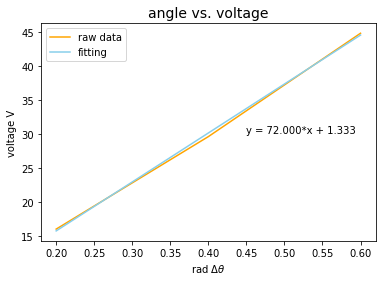

In [7]:
plt.plot(np.array(angles), np.array(volts), color="orange")
plt.plot(np.array(angles), lin_func(np.array(angles), *popt), color="skyblue")
plt.xlabel("rad $\\Delta \\theta$")
plt.ylabel("voltage V")
plt.title("angle vs. voltage", size=14)
plt.figtext(0.6, 0.5, s=f"y = {popt[0]:.3f}*x + {popt[1]:.3f}")
plt.legend(["raw data", "fitting"])
plt.show()

## Exp 1-2

In [8]:
weights, volts, radians = [], [], []
with open(os.path.join(base, "exp1-2.txt"), "r") as f:
    n  = int(f.readline())
    for _ in range(n):
        w, v, rad = map(float, f.readline().split())
        weights.append(2*w)
        volts.append(v)
        radians.append(rad)
        
weights, volts, radians

([100.0, 200.0, 300.0], [14.4, 30.4, 43.9], [0.1889, 0.3988, 0.5759])

In [9]:
def calculate_torque(mass, radius = None):
    g_const = 9.8
    if radius is None:
        radius = 1.27e-2
    return mass*radius*g_const

In [10]:
def calculate_kappa(mass, radian):
    return calculate_torque(mass/1000)/radian

In [11]:
for m, r in zip(weights, radians):
    print(calculate_kappa(m, r))
kappa = np.mean([calculate_kappa(m, r) for m, r in zip(weights, radians)])
kappa

0.06588671254632081
0.06241725175526581
0.06483417259940961


0.06437937896699875

In [12]:
weights = np.array(weights)
volts = np.array(volts)
radians = np.array(radians)

In [13]:
popt, pcov = curve_fit(lin_func, weights, volts)

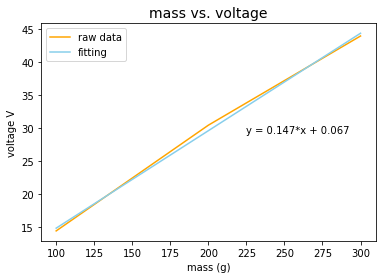

In [14]:
plt.plot(weights, volts, color="orange")
plt.plot(weights, lin_func(weights, *popt), color="skyblue")
plt.xlabel("mass (g)")
plt.ylabel("voltage V")
plt.title("mass vs. voltage", size=14)
plt.figtext(0.6, 0.5, s=f"y = {popt[0]:.3f}*x + {popt[1]:.3f}")
plt.legend(["raw data", "fitting"])
plt.show()

## Exp 1-3

In [15]:
brass = 214/1000
nums, periods = [], []
with open(os.path.join(base, "exp1-3.txt"), "r") as f:
    n = int(f.readline())
    for _ in range(n):
        n, p = map(float, f.readline().split())
        nums.append(n)
        periods.append(p)
nums, periods

([0.0, 2.0, 4.0, 6.0, 8.0], [2.1, 2.4, 2.7, 2.9, 3.1])

In [16]:
def period_square(period):
    return (period/(2*np.pi))**2

In [17]:
p_sqr = np.array([period_square(p) for p in periods])
nums = np.array(nums)

In [18]:
popt, pcov = curve_fit(lin_func, nums, p_sqr)

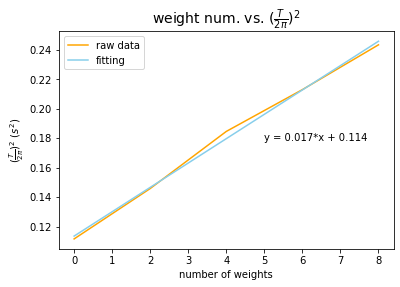

In [19]:
plt.plot(nums, p_sqr, color="orange")
plt.plot(nums, lin_func(nums, *popt), color="skyblue")
plt.xlabel("number of weights")
plt.ylabel("$(\\frac{T}{2\pi})^2$ ($s^2$)")
plt.title("weight num. vs. $(\\frac{T}{2\pi})^2$", size=14)
plt.figtext(0.6, 0.5, s=f"y = {popt[0]:.3f}*x + {popt[1]:.3f}")
plt.legend(["raw data", "fitting"])
plt.show()

## Exp 1-4

In [20]:
vins, deltav = [], []
with open(os.path.join(base, "exp1-4.txt"), "r") as f:
    freq = int(f.readline())
    n = int(f.readline())
    for _ in range(n):
        vin, volt = map(float, f.readline().split())
        vins.append(vin/1000)
        deltav.append(volt)
        
vins, deltav

([0.1, 0.25, 0.4, 0.5], [3.68, 10.0, 14.7, 18.0])

In [21]:
def volt_to_rad(voltage, v_per_rad = None):
    if v_per_rad is None:
        v_per_rad = volt_per_rad
    return voltage/v_per_rad

In [22]:
radians = np.array([volt_to_rad(v) for v in deltav])
radians

array([0.05111111, 0.13888889, 0.20416666, 0.25      ])

In [23]:
def get_current(voltage, resistance = None):
    if resistance is None:
        resistance = 7.6
    return voltage/resistance

In [24]:
def get_magnet(voltage):
    N = 201
    a = 2.20
    mu_0 = 4*np.pi*(1e-7)
    current = get_current(voltage)
    term1 = (mu_0*current*N*(a**2))
    term2 = ((a**2)+((a/2)**2))**(-3/2)
    return term1*term2

In [25]:
magnets = np.array([get_magnet(v) for v in vins])
magnets

array([1.08094757e-06, 2.70236892e-06, 4.32379027e-06, 5.40473784e-06])

In [26]:
popt, pcov = curve_fit(lin_func, radians, magnets)
popt

array([ 2.18609176e-05, -1.42557428e-07])

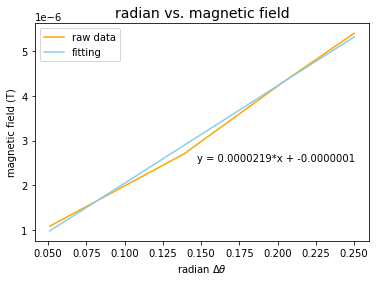

In [27]:
plt.plot(radians, magnets, color="orange")
plt.plot(radians, lin_func(radians, *popt), color="skyblue")
plt.xlabel("radian $\Delta \\theta$")
plt.ylabel("magnetic field (T)")
plt.title("radian vs. magnetic field", size=14)
plt.figtext(0.5, 0.4, s=f"y = {popt[0]:.7f}*x + {popt[1]:.7f}")
plt.legend(["raw data", "fitting"])
plt.show()

## Exp 1-9

In [29]:
freqs, amps = [], []
with open(os.path.join(base, "exp1-9.txt"), "r") as f:
    title = f.readline()
    print(title)
    n = int(f.readline())
    for _ in range(n):
        freq, amp = map(float, f.readline().split())
        freqs.append(freq)
        amps.append(amp)

    
freqs, amps

out in 2.85shift



([330.0, 570.0, 770.0], [14.6, 20.3, 7.36])

In [30]:
kappa

0.06437937896699875